
{'ts': array([[datetime.datetime(2013, 5, 15, 10, 37, 23), 23, 37, ..., 2, 15, 5],
       [datetime.datetime(2013, 5, 15, 10, 42, 30), 30, 42, ..., 2, 15, 5],
       [datetime.datetime(2013, 5, 15, 10, 47, 30), 30, 47, ..., 2, 15, 5],
       ..., 
       [datetime.datetime(2015, 6, 30, 0, 46, 32), 32, 46, ..., 1, 30, 6],
       [datetime.datetime(2015, 6, 30, 0, 51, 32), 32, 51, ..., 1, 30, 6],
       [datetime.datetime(2015, 6, 30, 0, 56, 32), 32, 56, ..., 1, 30, 6]], dtype=object), 'value': array([     0.,      0.,      0., ...,  20065.,  20065.,  20065.])}

total length: 190822

######### trimmed ##########

ts: 2013-05-15 10:30:00 	value: 0
ts: 2013-05-15 10:40:00 	value: 0
ts: 2013-05-15 10:50:00 	value: 0
ts: 2013-05-15 11:00:00 	value: 0
ts: 2013-05-15 11:10:00 	value: 0
.
.
.
ts: 2015-06-30 00:00:00 	value: 20065
ts: 2015-06-30 00:10:00 	value: 20065
ts: 2015-06-30 00:20:00 	value: 20065
ts: 2015-06-30 00:30:00 	value: 20065

total length: 96254
0.504417729612
y_max: 20065.0


/Users/JH/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


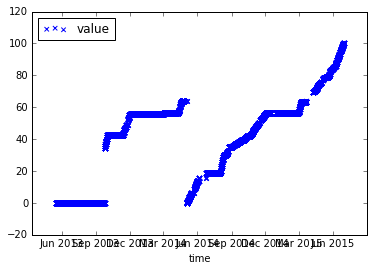

In [1]:
# -*- coding: utf-8 -*-

import sys
import cPickle as pickle
import copy
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

try:
    file_path = '/Users/JH/Documents/GitHub/EnergyData_jhyun/VTT/VTT_GW1_HA2_VM_EP_KV_K.bin'
    # file_path = sys.argv[1]
except IndexError as err:
    print('IndexError: ' + str(err))
    print('Usage: python parsing <filename>')
    exit()

data = pickle.load(open(file_path))
time_stamp = data['ts']
value = data['value']

print
print(data)

print
print('total length: ' + str(len(time_stamp)))

x, y = [], []

minute_checker = time_stamp[0][0].minute / 10
item = 0
value_temp = 0

for i in range(0, len(time_stamp)):
    if time_stamp[i][2] / 10 == minute_checker:
        item += 1
        value_temp += value[i]
    else:
        x.append(time_stamp[i - 1][0].replace(minute=10 * minute_checker, second=0))

        minute_checker += 1
        if minute_checker == 6:
            minute_checker = 0

        if item == 0:
            y.append(y[-1])
        else:
            y.append(value_temp / item)
            value_temp = 0
            item = 0

        i = i - 1

print
print('######### trimmed ##########')
print

for i in range(0, 5):
    print('ts: ' + str(x[i])),
    print('\tvalue: %d' % y[i])

print('.\n.\n.')

for i in xrange(len(x) - 5, len(x) - 1):
    print('ts: ' + str(x[i])),
    print('\tvalue: %d' % y[i])

print
print('total length: ' + str(len(x)))
print(float(len(x)) / len(time_stamp))

y_temp = copy.copy(y)
y_temp.sort()
y_max = y_temp[-100]
print('y_max: ' + str(y_max))

for i in range(0, len(y)):
    y[i] = (y[i] / y_max) * 100

plt.scatter(x, y, marker='x', label="value")

plt.xlabel('time')
plt.legend(loc=2)
plt.show()

In [2]:
import vectorize_02 as v

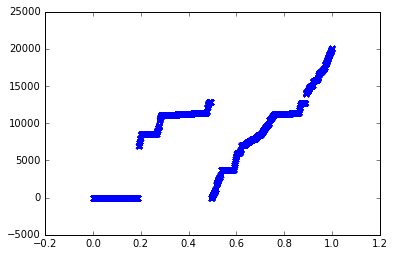

In [3]:
v.unpickling(file_path)

In [5]:
def normalization(list):
    normalizer = n_th_maximun(100, list)
    list_normalized = np.array(list) / normalizer

In [6]:
def vectorization(list):
    dim = 20
    slicing_size = len(list) / dim
    vec = []
    vec_collector = 0

    for i in range(0, len(list)):
        vec_collector += list[i]
        if (i + 1) % slicing_size == 0:
            vec.append(int(vec_collector / slicing_size))
            vec_collector = 0
    return vec


In [7]:
y = vectorization(y)

In [8]:
y

[0, 0, 0, 7, 42, 48, 55, 55, 56, 52, 11, 19, 33, 39, 47, 56, 56, 62, 77, 90]

In [9]:
x, y = [], []

minute_checker = time_stamp[0][0].minute / 10
item = 0
value_temp = 0

for i in range(0, len(time_stamp)):
    if time_stamp[i][2] / 10 == minute_checker:
        item += 1
        value_temp += value[i]
    else:
        x.append(time_stamp[i - 1][0].replace(minute=10 * minute_checker, second=0))

        minute_checker += 1
        if minute_checker == 6:
            minute_checker = 0

        if item == 0:
            y.append(y[-1])
        else:
            y.append(value_temp / item)
            value_temp = 0
            item = 0

        i = i - 1

